# Morphological Image Processing

Richell Flores

## Objectives

By the end of this notebook, students are expected to
- perform basic morphological transformations
- implement morphological algorithms

# Main reference

https://scikit-image.org/docs/stable/api/skimage.morphology.html

https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html

https://docs.scipy.org/doc/scipy/reference/ndimage.html

# Required packages

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

For this module, we will be using the `scikit-image` package.

In [11]:
from skimage import morphology

# Morphological operations on binary images

## Erosion: `binary_erosion(image_arr, se)`

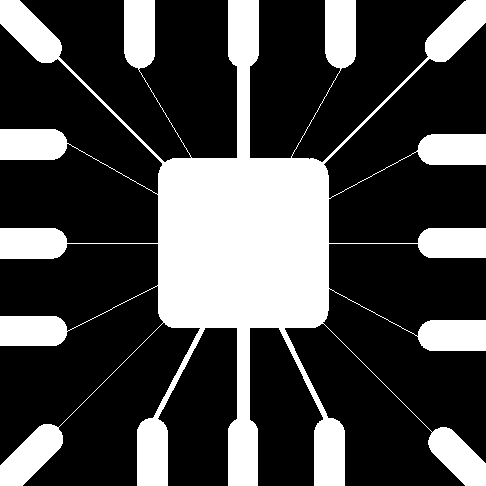

In [12]:
wirebond = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/wirebond.tif").convert('L')
wirebond


In [13]:
morphology.square(11)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

Since we are dealing with binary images, `binary_erosion` works faster.

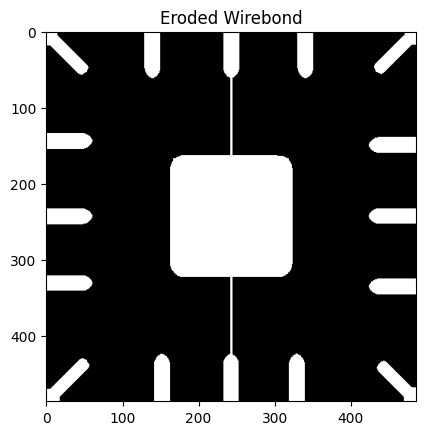

In [14]:
wirebond_array = np.array(wirebond)

eroded_wirebond = morphology.binary_erosion(wirebond_array, morphology.square(11))

plt.imshow(eroded_wirebond, cmap='gray')
plt.title('Eroded Wirebond')
plt.show()

**Try it!** Do the same but using increasing sizes of the structuring element. What do you observe about the shape of the center square? At what point does the other aspects of the image removed?

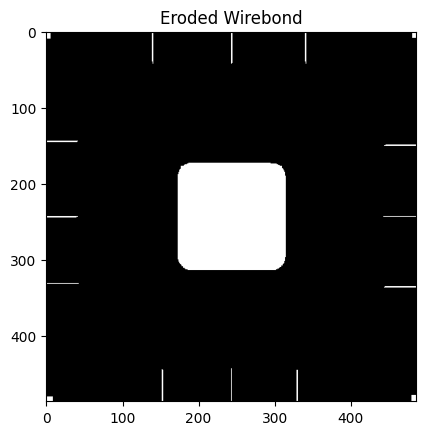

In [18]:
#Try sizes 20, 30, 40, 50

eroded_wirebond_30 = morphology.binary_erosion(wirebond_array, morphology.square(30))

plt.imshow(eroded_wirebond_30, cmap='gray')
plt.title('Eroded Wirebond')
plt.show()

# The lines disappear if we increase the size of the structuring element, square.

Let's try to use a different structuring element.

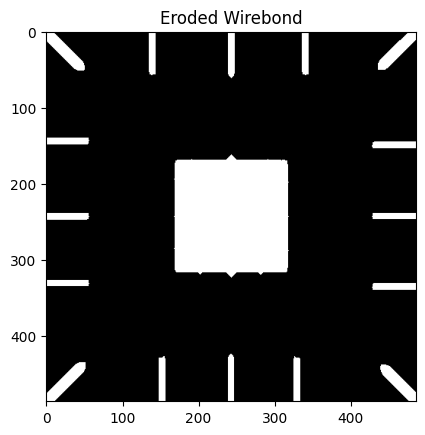

In [20]:
eroded_wirebond = morphology.binary_erosion(wirebond_array, morphology.diamond(radius=11))

plt.imshow(eroded_wirebond, cmap='gray')
plt.title('Eroded Wirebond')
plt.show()

**Think!** What happened when we changed the structuring element from square to diamond? In what instance is using a square SE better than a diamond SE and vice versa?

## Dilation: `binary_dilation(image_arr, se)`

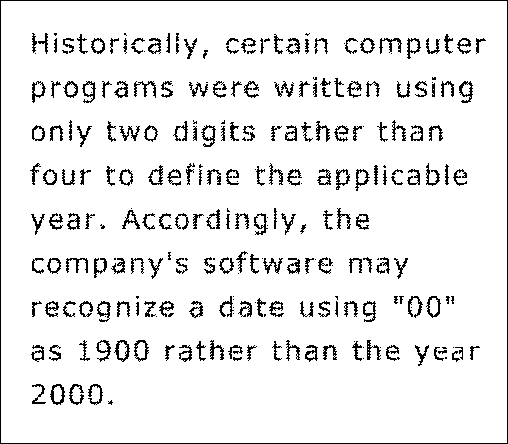

In [23]:
text = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/text.tif").convert('L')
text

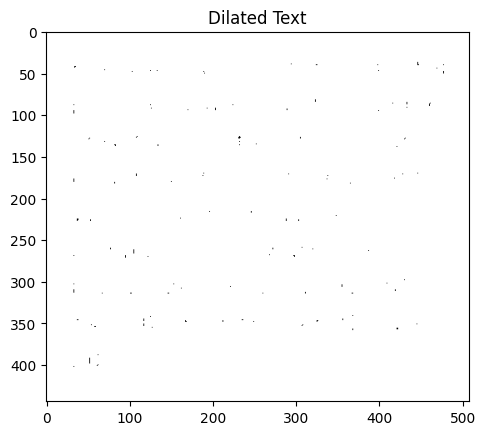

In [24]:
text_arr = np.array(text)

dilated_text = morphology.binary_dilation(text_arr, morphology.square(3))

plt.imshow(dilated_text, cmap='gray')
plt.title('Dilated Text')
plt.show()

**Think about it** What went wrong with the image? What was considered foreground and background?

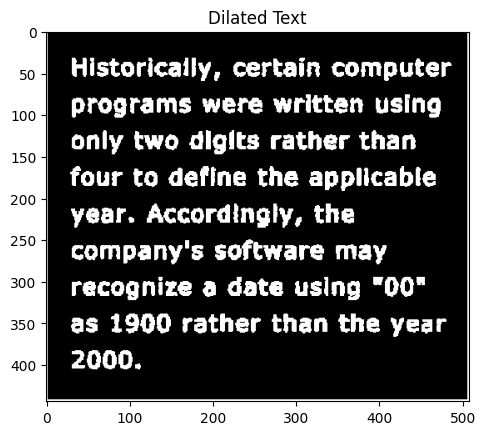

In [26]:
dilated_text = morphology.binary_dilation(~text_arr, morphology.square(3))

plt.imshow(dilated_text, cmap='gray')
plt.title('Dilated Text')
plt.show()

**Try it!** Use a different structuring element and see how it affects the dilation.

In [27]:
custom_se = np.array([[1,1,0],
                      [1,1,0],
                      [1,1,0]])

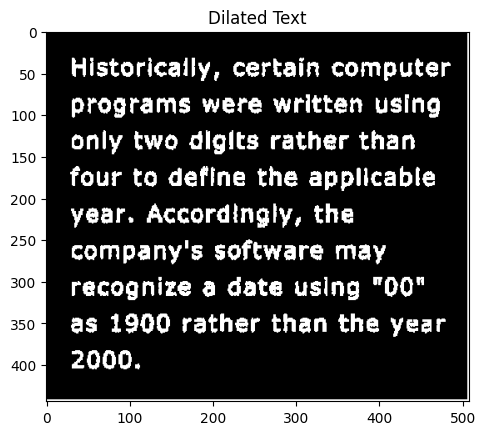

In [28]:
dilated_text = morphology.binary_dilation(~text_arr, custom_se)

plt.imshow(dilated_text, cmap='gray')
plt.title('Dilated Text')
plt.show()

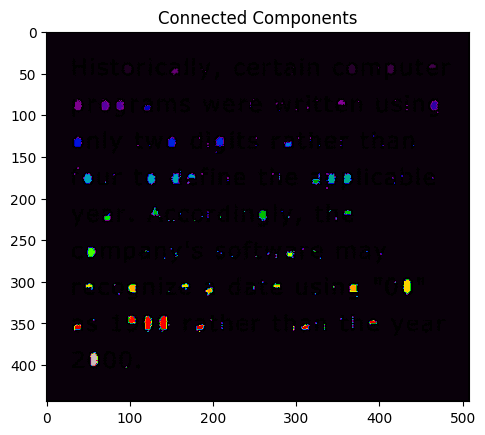

Number of connected components: 209


In [43]:
# Count the number of characters

# prompt: get connected components

from skimage import measure

text_arr = np.array(text)
labels = measure.label(text_arr, connectivity=1)  # 2 for 4-connected, 1 for 8-connected components

plt.imshow(labels, cmap='nipy_spectral')
plt.title('Connected Components')
plt.show()

# You can access the number of connected components using:
num_components = labels.max()
print(f"Number of connected components: {num_components}")

## Opening: `binary_opening(image_arr, se)`

"... the ability to eliminate regions narrower than the structuring element is one of the key features of morphological opening."

Let's consider the wirebond image again.

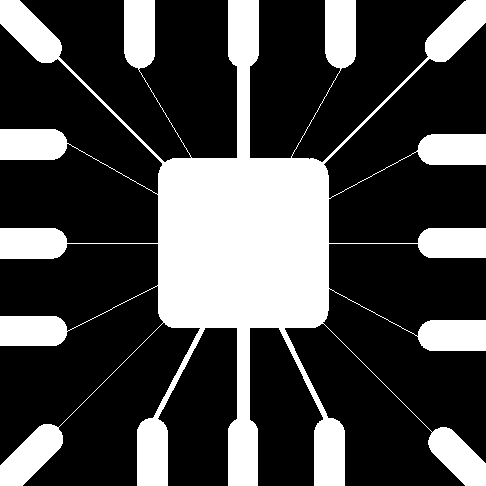

In [31]:
wirebond

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

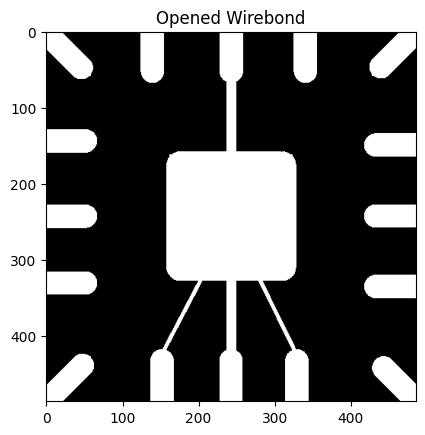

In [32]:
wirebond_arr = np.array(wirebond)

opened_wirebond = morphology.binary_opening(wirebond_arr, morphology.ellipse(1,1))

plt.imshow(opened_wirebond, cmap='gray')
plt.title('Opened Wirebond')
plt

## Closing: `binary_closing(image_arr, se)`

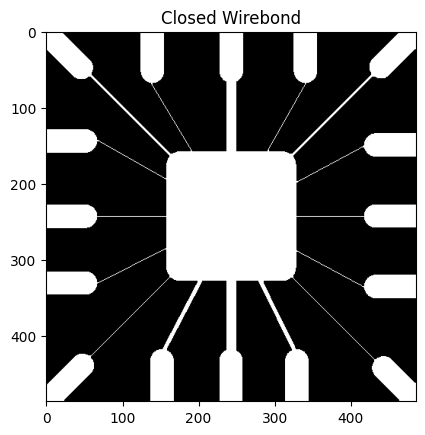

In [33]:
closed_wirebond = morphology.binary_closing(wirebond_arr, morphology.ellipse(1,1))

plt.imshow(closed_wirebond, cmap='gray')
plt.title('Closed Wirebond')
plt.show()

### Example

Consider the following noisy image of a fingerprint. Successively apply the following:

1. Erosion
2. Dilation
3. Dilation
4. Erosion

Use a $3 \times 3$ square with 1s as a structuring element.

Compare the result if you do opening followed by a closing.

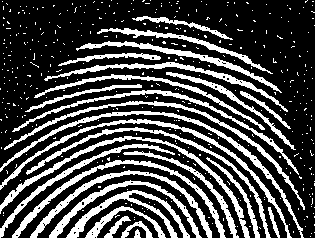

In [37]:
fingerprint_noisy = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/fingerprint_noisy.tif").convert('L')
fingerprint_noisy



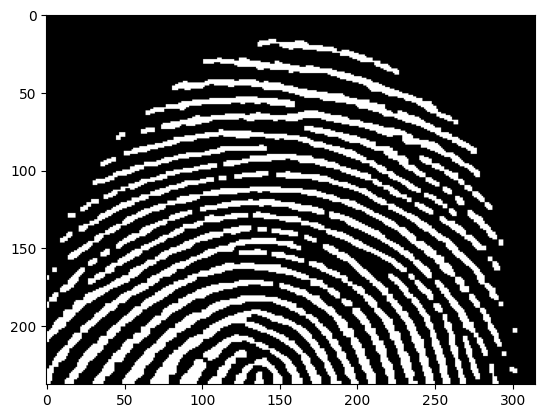

In [40]:
# Apply erosion, dilation, dilation, erosion

fingerprint_noisy_arr = np.array(fingerprint_noisy)
fingerprint_noisy_arr_1 = morphology.binary_erosion(fingerprint_noisy_arr, morphology.square(3))
fingerprint_noisy_arr_2 = morphology.binary_dilation(fingerprint_noisy_arr_1, morphology.square(3))
fingerprint_noisy_arr_3 = morphology.binary_dilation(fingerprint_noisy_arr_2, morphology.square(3))
fingerprint_noisy_arr_4 = morphology.binary_erosion(fingerprint_noisy_arr_3, morphology.square(3))

plt.imshow(fingerprint_noisy_arr_4, cmap = 'gray')


### Answer: unhide to check answer

Text(0.5, 1.0, 'Final Result')

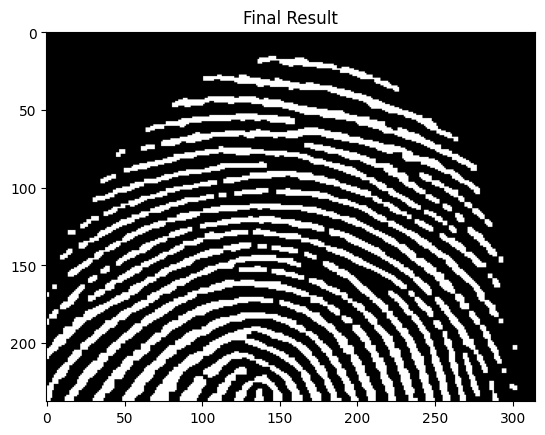

In [39]:
fingerprint_arr = np.array(fingerprint_noisy)

fingerprint_eroded = morphology.binary_erosion(fingerprint_arr, morphology.square(3))
fingerprint_dilated1 = morphology.binary_dilation(fingerprint_eroded, morphology.square(3))
fingerprint_dilated2 = morphology.binary_dilation(fingerprint_dilated1, morphology.square(3))
fingerprint_eroded2 = morphology.binary_erosion(fingerprint_dilated2, morphology.square(3))

plt.imshow(fingerprint_eroded2, cmap='gray')
plt.title('Final Result')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

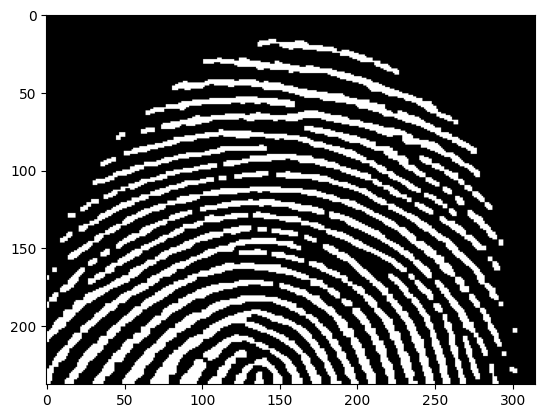

In [ ]:
fingerprint_opened = morphology.binary_opening(fingerprint_arr, morphology.square(3))
fingerprint_closed = morphology.binary_closing(fingerprint_opened, morphology.square(3))

plt.imshow(fingerprint_closed, cmap='gray')
plt

In [ ]:
np.array_equal(fingerprint_eroded2, fingerprint_closed)

True

# Hit-or-miss transform

In [44]:
from scipy.ndimage import binary_hit_or_miss

Let's consider the example from the ndimage documentation.

In [45]:
a = np.array([[0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 0, 0, 0],
                [0, 1, 1, 0, 0, 1, 0],
                [0, 1, 1, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0]])

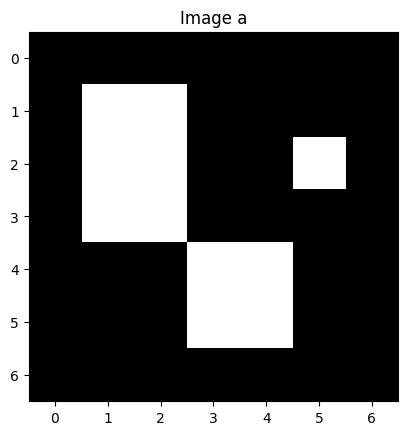

In [46]:
plt.imshow(a, cmap='gray')
plt.title('Image a')
plt.show()

In [47]:
se = np.array([[1,0,0],
               [0,1,1],
               [0,1,1]])

In [48]:
a_hm = binary_hit_or_miss(a, se)

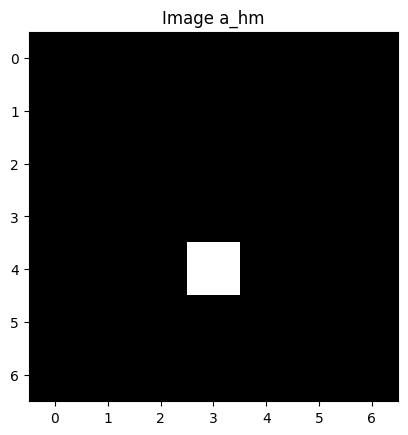

In [49]:
plt.imshow(a_hm, cmap='gray')
plt.title('Image a_hm')
plt.show()

**Check** Verify that the hit-or-miss transform is equivalent to $(A \ominus B_1) \cap (A^c \ominus B_2)$.

In [50]:
# prompt: Verify that the hit-or-miss transform is equivalent to $(A \ominus B_1) \cap (A^c \ominus B_2)$.

# Verify that the hit-or-miss transform is equivalent to (A ⊖ B1) ∩ (Ac ⊖ B2).

# Define the structuring element
se = np.array([[1, 0, 0],
               [0, 1, 1],
               [0, 1, 1]])

# Extract B1 and B2 from the structuring element
B1 = se * (se == 1)
B2 = se * (se == 0)
B2[B2 == 0] = 1

# Calculate A ⊖ B1 using binary erosion
A_minus_B1 = morphology.binary_erosion(a, B1)

# Calculate Ac ⊖ B2 using binary erosion
Ac = ~a
Ac_minus_B2 = morphology.binary_erosion(Ac, B2)

# Calculate the intersection of (A ⊖ B1) and (Ac ⊖ B2)
intersection = np.logical_and(A_minus_B1, Ac_minus_B2)

# Compare the result with the hit-or-miss transform
print(np.array_equal(a_hm, intersection))

True


In [51]:
B2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

# Basic morphological algorithms

## Boundary extraction

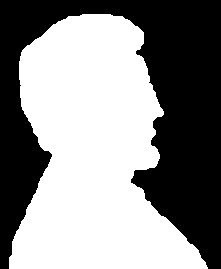

In [54]:
face = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/face.tif")
face



Text(0.5, 1.0, 'Boundary Face')

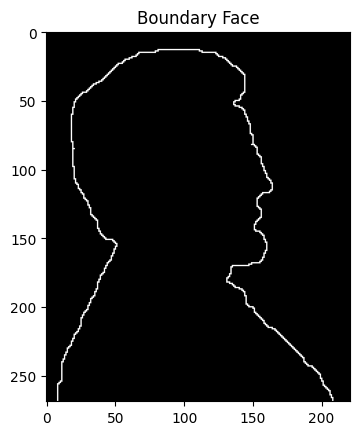

In [57]:
face_arr = np.array(face)

boundary_face = morphology.binary_dilation(face_arr, morphology.square(3)) ^ face_arr #^ is the logical xor (equivalent to minus)

plt.imshow(boundary_face, cmap='gray')
plt.title('Boundary Face')

Experiment whether changing the SE also changes the appearance of the boundary.

## Hole filling: `scipy.ndimage.binary_fill_holes`

In [58]:
from scipy.ndimage import binary_fill_holes

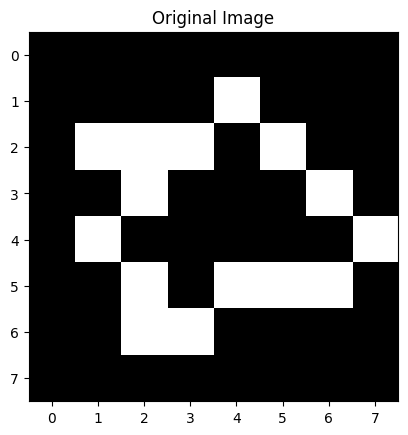

In [59]:
image_arr = np.array([[0,0,0,0,0,0,0,0],
                      [0,0,0,0,1,0,0,0],
                      [0,1,1,1,0,1,0,0],
                      [0,0,1,0,0,0,1,0],
                      [0,1,0,0,0,0,0,1],
                      [0,0,1,0,1,1,1,0],
                      [0,0,1,1,0,0,0,0],
                      [0,0,0,0,0,0,0,0]])

plt.imshow(image_arr, cmap='gray')
plt.title('Original Image')
plt.show()

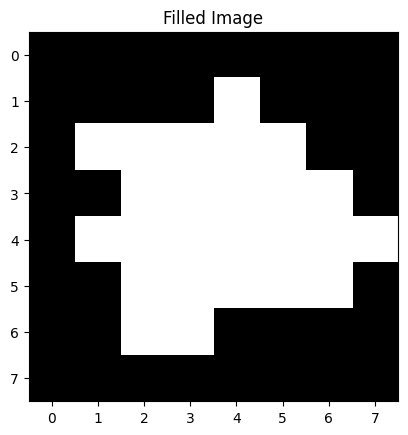

In [60]:
filled_image = binary_fill_holes(image_arr)

plt.imshow(filled_image, cmap='gray')
plt.title('Filled Image')
plt.show()

**Try it!** Perform hole filling on the following image.

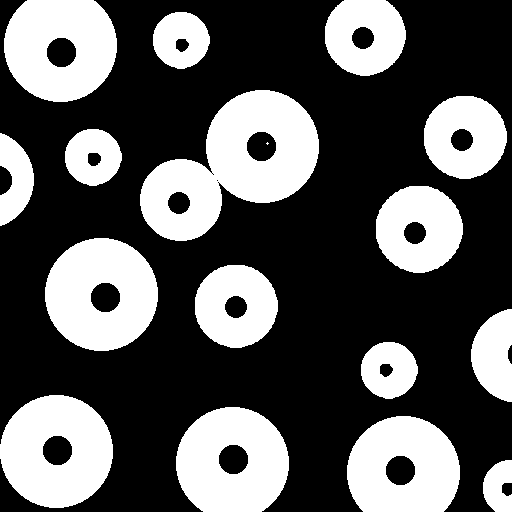

In [64]:
circles = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/circles.tif")
circles



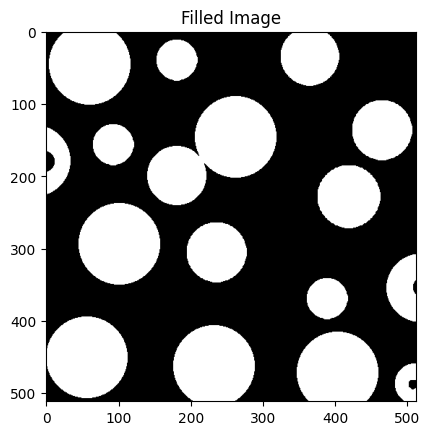

In [66]:
circles_arr = np.array(circles)

filled_image = binary_fill_holes(circles_arr)

plt.imshow(filled_image, cmap='gray')
plt.title('Filled Image')
plt.show()

## Connected components

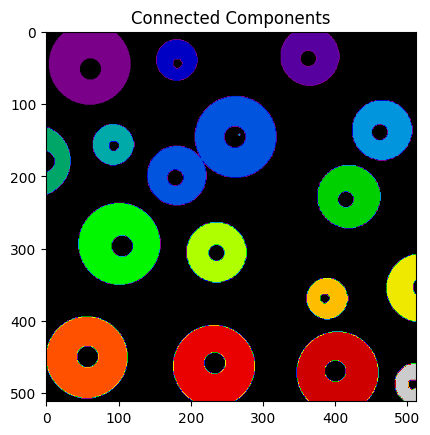

Number of connected components: 17


In [ ]:
# prompt: get connected components

from skimage import measure

circles_arr = np.array(circles)
labels = measure.label(circles_arr, connectivity=1)  # 2 for 4-connected, 1 for 8-connected components

plt.imshow(labels, cmap='nipy_spectral')
plt.title('Connected Components')
plt.show()

# You can access the number of connected components using:
num_components = labels.max()
print(f"Number of connected components: {num_components}")

### Example

**Try it out!** Perform thresholding, erosion, and then do a connected components analysis to the following image.

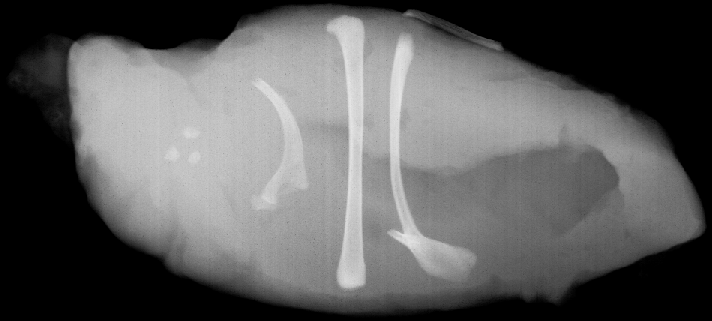

In [67]:
chicken_bones = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/chicken_bones.tif")
chicken_bones


### Answer: unhide to check answer

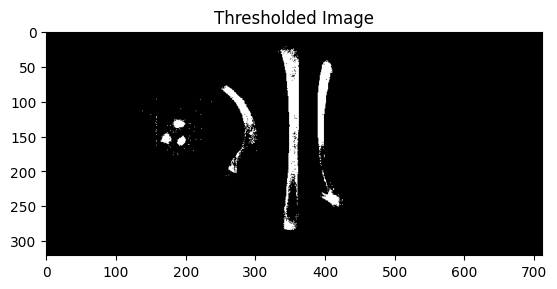

In [68]:
chicken_bones_arr = np.array(chicken_bones)
threshold_value = 200
thresholded_chicken = (chicken_bones_arr > threshold_value) * 255

plt.imshow(thresholded_chicken, cmap='gray')
plt.title('Thresholded Image')
plt.show()

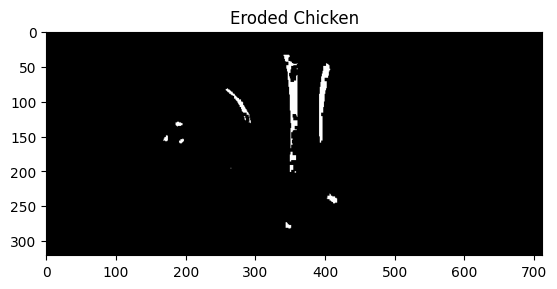

In [ ]:
eroded_chicken = morphology.binary_erosion(thresholded_chicken, morphology.square(5))

plt.imshow(eroded_chicken, cmap='gray')
plt.title('Eroded Chicken')
plt.show()

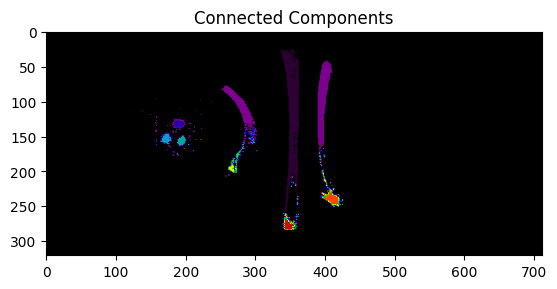

Number of connected components: 202


In [69]:
labels = measure.label(thresholded_chicken, connectivity=1)  # 2 for 4-connected, 1 for 8-connected components

plt.imshow(labels, cmap='nipy_spectral')
plt.title('Connected Components')
plt.show()

# You can access the number of connected components using:
num_components = labels.max()
print(f"Number of connected components: {num_components}")

In [70]:
import pandas as pd

# Create a table to store the number of pixels per connected component
component_data = []
for component_label in range(1, num_components + 1):
    num_pixels = np.sum(labels == component_label)
    component_data.append({'Component Label': component_label, 'Number of Pixels': num_pixels})

# Create a Pandas DataFrame from the component data
df = pd.DataFrame(component_data)

# Display the table
df

,Component Label,Number of Pixels
0,1,1
1,2,1
2,3,2
3,4,2930
4,5,1
...,...,...
197,198,1
198,199,1
199,200,1
200,201,1


## Convex hull: `convex_hull_image(image_arr)`

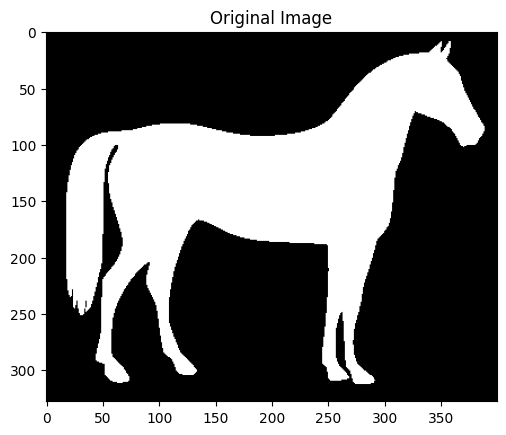

In [ ]:
from skimage import data, img_as_float

horse = ~(data.horse())
horse

plt.imshow(horse, cmap='gray')
plt.title('Original Image')
plt.show()

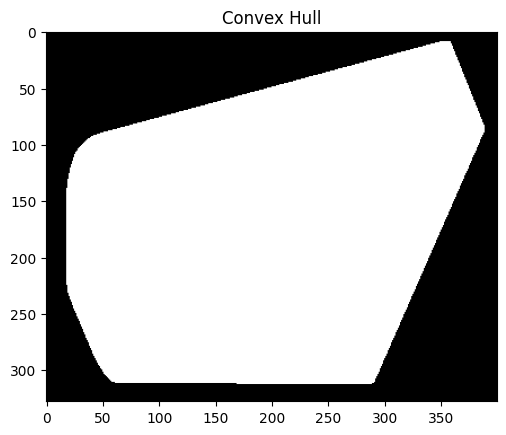

In [ ]:
horse_ch = morphology.convex_hull_image(horse)

plt.imshow(horse_ch, cmap='gray')
plt.title('Convex Hull')
plt.show()

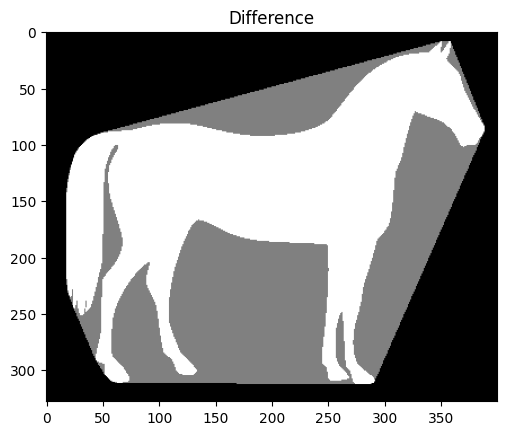

In [ ]:
chull_diff = img_as_float(horse_ch.copy())
chull_diff[horse] = 2

fig, ax = plt.subplots()
ax.imshow(chull_diff, cmap=plt.cm.gray)
ax.set_title('Difference')
plt.show()

## Skeleton: `skeletonize(image_arr)`

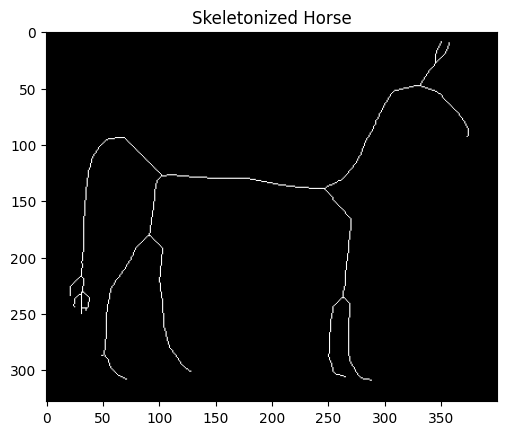

In [ ]:
horse_skeleton = morphology.skeletonize(horse)

plt.imshow(horse_skeleton, cmap='gray')
plt.title('Skeletonized Horse')
plt.show()

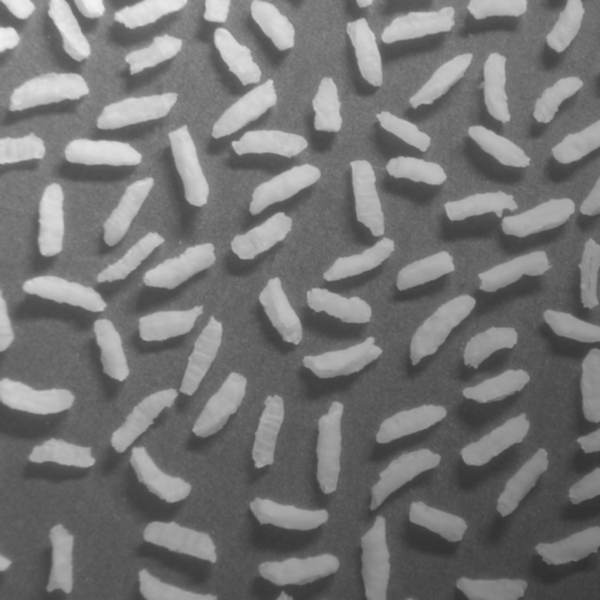

In [72]:
# Count the number of objects in the following pictures

rice = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/rice.tif")
rice


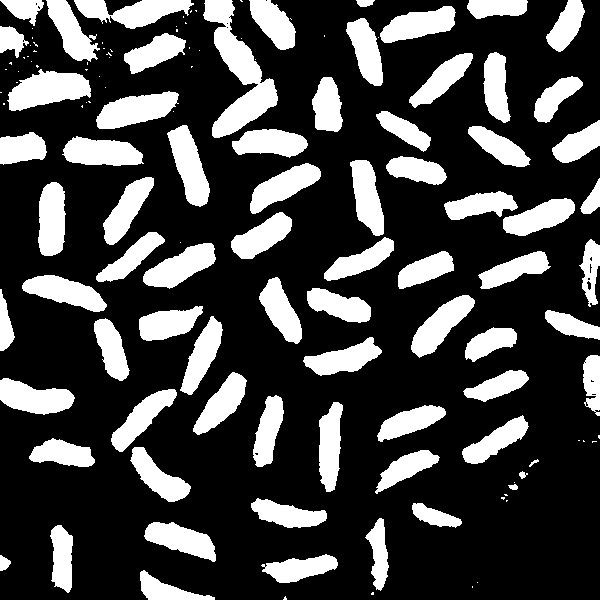

In [82]:
threshold_value = 135  # Set the threshold value (0-255)
thresholded_image = rice.point(lambda p: 255 if p > threshold_value else 0)
thresholded_image

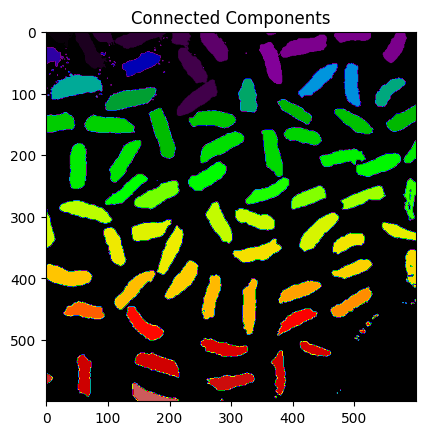

Number of connected components: 143


In [83]:
from skimage import measure

circles_arr = np.array(thresholded_image)
labels = measure.label(circles_arr, connectivity=1)  # 2 for 4-connected, 1 for 8-connected components

plt.imshow(labels, cmap='nipy_spectral')
plt.title('Connected Components')
plt.show()

# You can access the number of connected components using:
num_components = labels.max()
print(f"Number of connected components: {num_components}")